# Convolutional Neural Network for Image Classification

# In this project we are going to,
1. Load data into our local file from an url.
2. Read all the file from local repository using python glob,pathlib and openCV.
3. make convert images into numpy array.
4. seperating independent and target column.
5. Train Test Split
6. Build CNN model for prediction
7. Analysis the output using Tensorboard and matplotlib.
8. Try to imporve the accuracy performing data Augmentation

In [1]:
import pathlib
import numpy as np
import matplotlib.pylab as plt
from tensorflow import keras
from keras import utils
import os
import pathlib
import glob
import cv2

In [2]:
# Loading data from online url
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = utils.get_file('flower_photos', origin=data_url, cache_dir='.', untar=True)

In [3]:
path = pathlib.Path(data_dir)
path

WindowsPath('datasets/flower_photos')

In [4]:
len(list(path.glob('*/*.jpg')))

3670

In [5]:
# Loading file path's from specific flower folders
flowers = {
    'roses' : list(path.glob('*roses/*.jpg')),
    'daisy' : list(path.glob('*daisy/*.jpg')),
    'dandelion': list(path.glob('*dandelion/*.jpg')),
    'sunflower': list(path.glob('*sunflowers/*.jpg')),
    'tulip': list(path.glob('*tulips/*.jpg')),
}

In [6]:
labels = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulip': 4,
}

In [7]:
# make numpy array of feature and target
x = []
y = []

for names, flowers_path in flowers.items():
    for flower in flowers_path:
        image = cv2.imread(str(flower))
        image = cv2.resize(image, (180,180))
        x.append(image)
        y.append(labels[names])
        
x = np.array(x)
y = np.array(y)

In [8]:
# scaling the image data
x = x/255

In [9]:
from keras import layers, models, callbacks

In [10]:
# Split into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
earlystop = callbacks.EarlyStopping(monitor='loss', verbose=1)
tensorboard = callbacks.TensorBoard(log_dir='logs/{}'.format('flower_model'))

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, activation='relu', padding='same', kernel_size=(3,3), input_shape=(180, 180, 3)),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters=32, activation='relu', padding='same',kernel_size=(3,3)),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters=64, activation='relu', padding='same',kernel_size=(3,3)),
    layers.MaxPooling2D((3,3)),
    layers.Dropout(0.5),
    layers.Flatten(),

    layers.Dense(150, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(x_train,y_train,epochs=100, callbacks=[earlystop, tensorboard], validation_split=0.2)

Epoch 1/100
69/69 [==============================] - 13s 156ms/step - loss: 1.4078 - accuracy: 0.3562 - val_loss: 1.2479 - val_accuracy: 0.4664
Epoch 2/100
69/69 [==============================] - 10s 142ms/step - loss: 1.1630 - accuracy: 0.5216 - val_loss: 1.0870 - val_accuracy: 0.5554
Epoch 3/100
69/69 [==============================] - 9s 133ms/step - loss: 1.0599 - accuracy: 0.5684 - val_loss: 1.0090 - val_accuracy: 0.5989
Epoch 4/100
69/69 [==============================] - 8s 122ms/step - loss: 0.9679 - accuracy: 0.6202 - val_loss: 0.9398 - val_accuracy: 0.6279
Epoch 5/100
69/69 [==============================] - 8s 122ms/step - loss: 0.9188 - accuracy: 0.6383 - val_loss: 0.9299 - val_accuracy: 0.6116
Epoch 6/100
69/69 [==============================] - 9s 132ms/step - loss: 0.8702 - accuracy: 0.6529 - val_loss: 0.8764 - val_accuracy: 0.6751
Epoch 7/100
69/69 [==============================] - 9s 129ms/step - loss: 0.8376 - accuracy: 0.6756 - val_loss: 0.8487 - val_accuracy: 0.67

In [14]:
y_log = cnn.predict(x_test)

29/29 [==============================] - 2s 36ms/step


In [15]:
y_pred = y_log.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,y_pred)

0.6928104575163399

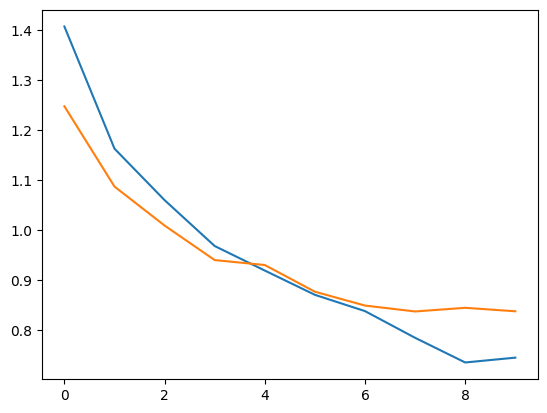

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

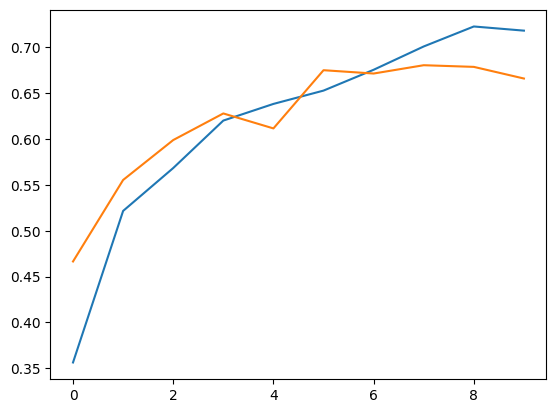

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [76]:
x_train.shape

(2752, 180, 180, 3)

# Performing Data Augmentation

In [77]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [90]:
cnn = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=16, activation='relu', padding='same',kernel_size=(3,3)),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters=32, activation='relu', padding='same',kernel_size=(3,3)),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(filters=64, activation='relu', padding='same',kernel_size=(3,3)),
    layers.MaxPooling2D((3,3)),
    layers.Dropout(0.5),
    layers.Flatten(),

    layers.Dense(150, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(x_train,y_train,epochs=100, callbacks=earlystop, validation_split=0.2)

Epoch 1/100
69/69 [==============================] - 30s 330ms/step - loss: 1.4391 - accuracy: 0.3458 - val_loss: 1.1564 - val_accuracy: 0.4610
Epoch 2/100
69/69 [==============================] - 16s 239ms/step - loss: 1.1581 - accuracy: 0.5216 - val_loss: 1.0835 - val_accuracy: 0.5554
Epoch 3/100
69/69 [==============================] - 16s 238ms/step - loss: 1.0813 - accuracy: 0.5607 - val_loss: 0.9715 - val_accuracy: 0.6025
Epoch 4/100
69/69 [==============================] - 17s 248ms/step - loss: 0.9987 - accuracy: 0.5993 - val_loss: 0.9640 - val_accuracy: 0.6007
Epoch 5/100
69/69 [==============================] - 18s 268ms/step - loss: 0.9847 - accuracy: 0.6065 - val_loss: 0.9696 - val_accuracy: 0.5953
Epoch 6/100
69/69 [==============================] - 18s 268ms/step - loss: 0.9359 - accuracy: 0.6415 - val_loss: 0.9112 - val_accuracy: 0.6461
Epoch 7/100
69/69 [==============================] - 17s 247ms/step - loss: 0.9137 - accuracy: 0.6465 - val_loss: 0.8459 - val_accuracy:

In [91]:
y_log = cnn.predict(x_test)

29/29 [==============================] - 1s 34ms/step


In [92]:
y_pred = y_log.argmax(axis=1)

In [93]:
accuracy_score(y_test,y_pred)

0.7026143790849673

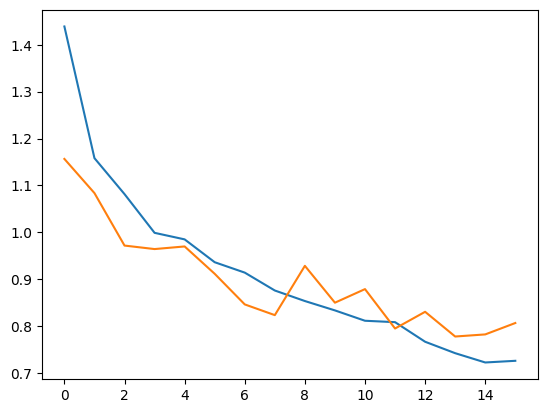

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()